# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) constituye una etapa esencial en el proceso de comprensión de conjuntos de datos. Durante esta fase, se persigue una comprensión profunda de la estructura subyacente, los patrones emergentes y las relaciones inherentes presentes en los datos.

## Objetivo
El propósito fundamental del EDA radica en desentrañar la riqueza oculta en los datos mediante la aplicación de diversas técnicas de visualización y análisis estadístico. Este proceso no solo permite una comprensión más profunda de los datos, sino que también proporciona una base sólida para la toma de decisiones informadas en etapas posteriores del análisis.

## Metodología
Durante el EDA, se emplean una variedad de herramientas y enfoques para explorar exhaustivamente los datos. Esto puede incluir la generación de gráficos, cálculos estadísticos descriptivos, identificación de valores atípicos, análisis de correlación y mucho más. El objetivo es obtener una visión holística de la información contenida en el conjunto de datos y revelar posibles patrones o tendencias significativas.

## Proceso
El proceso de EDA típicamente implica una serie de pasos iterativos. Comienza con la adquisición de los datos y su limpieza, seguido por la exploración sistemática de variables individuales y relaciones entre ellas. A medida que avanza el análisis, pueden surgir nuevas preguntas o áreas de interés, lo que conduce a una exploración más detallada y refinada.

## Herramientas
Para llevar a cabo un EDA efectivo, es fundamental contar con una variedad de herramientas y habilidades. Esto puede incluir el uso de bibliotecas de visualización como Matplotlib, Seaborn o Plotly en entornos como Python. Además, es importante tener un sólido conocimiento de técnicas estadísticas y la capacidad para interpretar los resultados obtenidos.

## Importar librerias

In [2]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
from scipy.stats import mode #Biblioteca de Python para matemáticas, ciencia e ingeniería
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python
from collections import Counter #Es una clase que facilita el conteo de elementos en una colección

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

## Cargar el archivo

In [3]:
cars = pd.read_csv(r"C:\Users\Gary Alexander Bean\Desktop\Proyecto-Integrador-M6\database\ML_cars limpio.csv")

## Vista previa

In [4]:
cars.head()

,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


## Distribucion estadistica de las variables numericas

In [5]:
print(cars.describe())

           car_id  door_number  wheel_base  car_length   car_width  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean   103.000000     3.121951   98.756585  174.049268   65.907805   
std     59.322565     0.994966    6.021776   12.337289    2.145204   
min      1.000000     2.000000   86.600000  141.100000   60.300000   
25%     52.000000     2.000000   94.500000  166.300000   64.100000   
50%    103.000000     4.000000   97.000000  173.200000   65.500000   
75%    154.000000     4.000000  102.400000  183.100000   66.900000   
max    205.000000     4.000000  120.900000  208.100000   72.300000   

       car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
count  205.000000   205.000000       205.000000   205.000000  205.000000   
mean    53.724878  2555.565854         4.419512   126.907317    3.329756   
std      2.443522   520.680204         1.441544    41.642693    0.270844   
min     47.800000  1488.000000         2.000000    61.000000    2

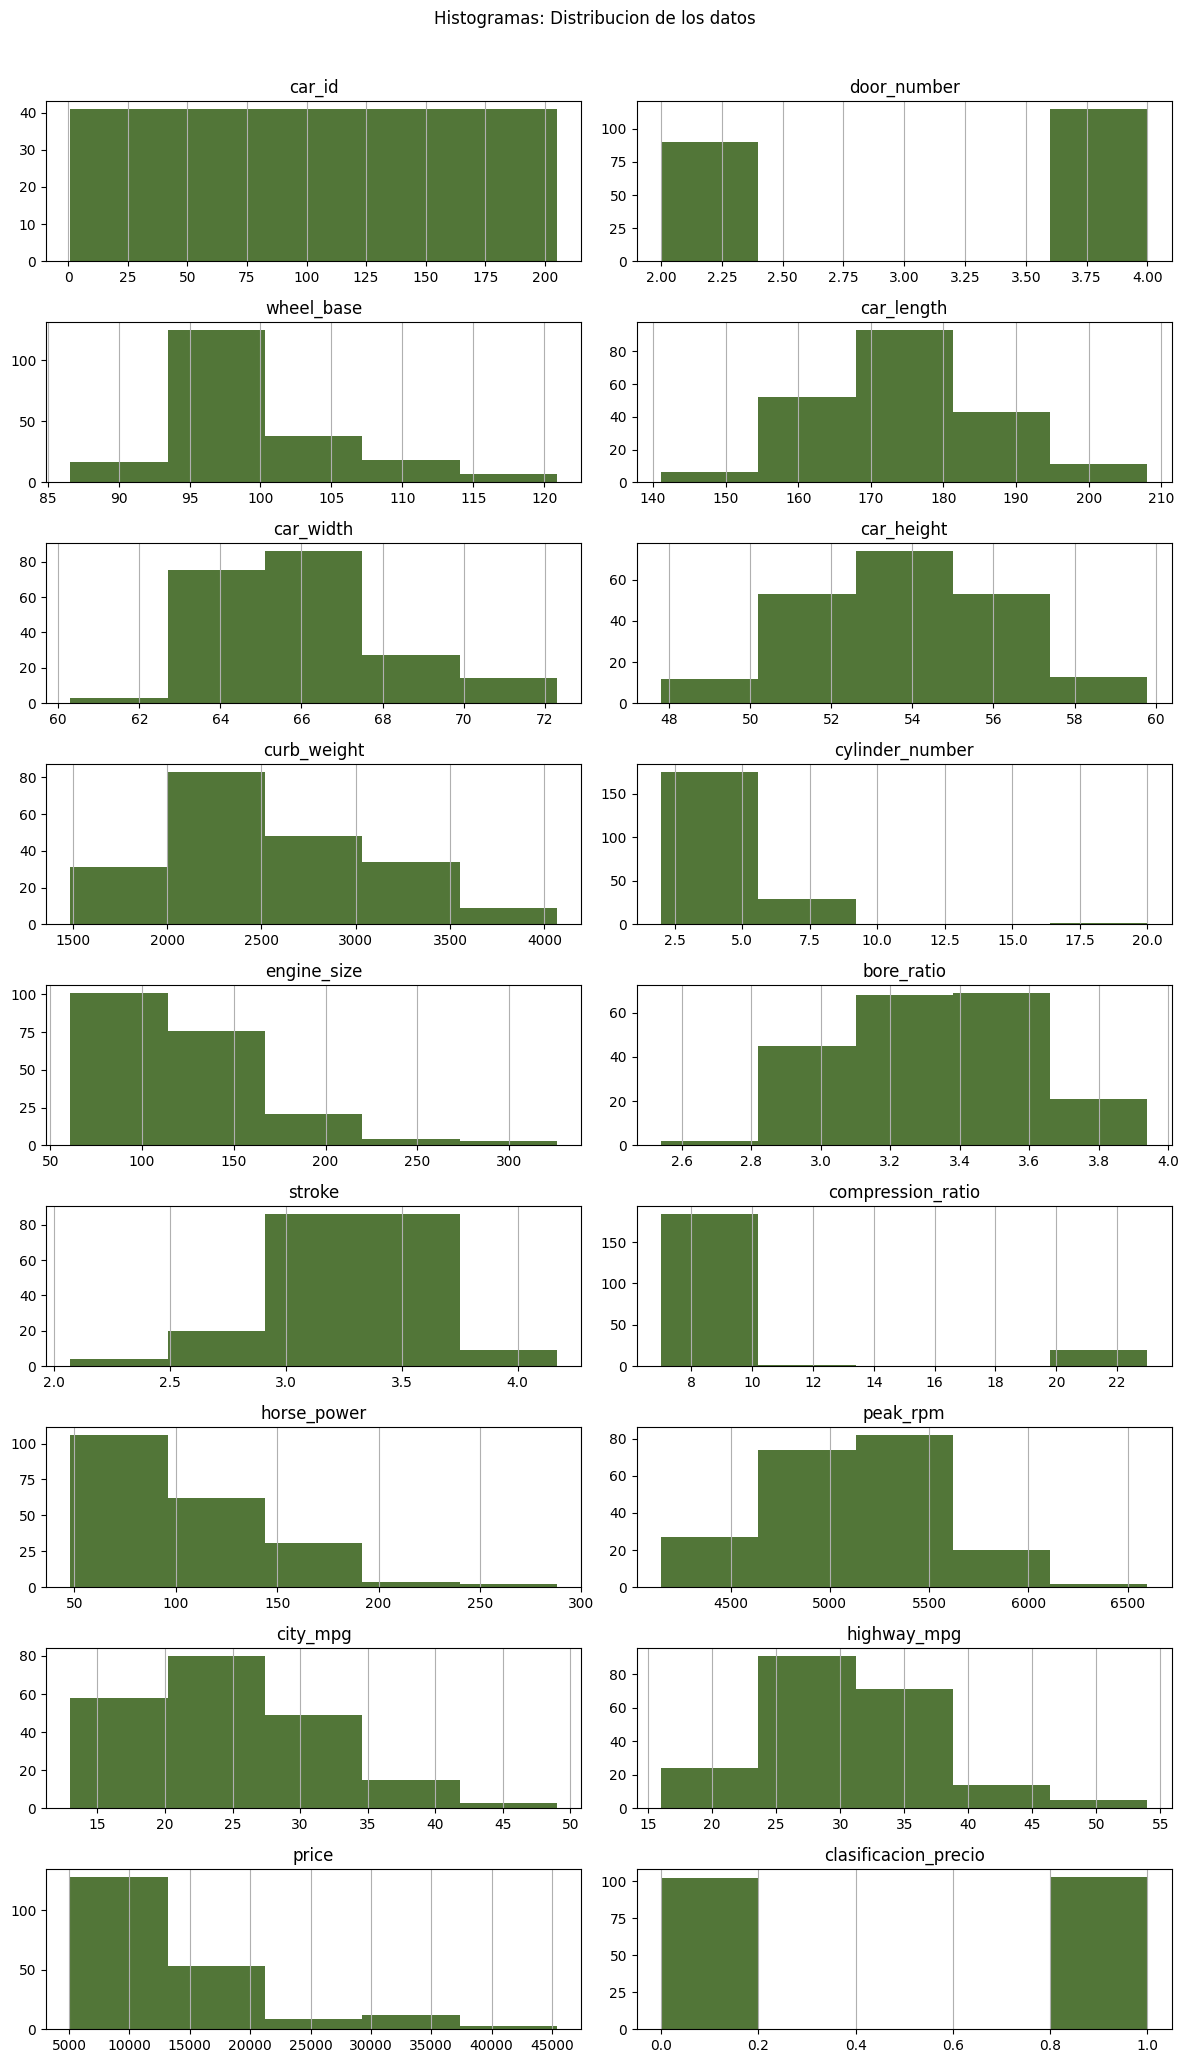

In [6]:
# Define la figura y los ejes para subgraficos
fig, axes = plt.subplots(9, 2, figsize=(12, 21))
fig.suptitle("Histogramas: Distribucion de los datos", fontsize=12)

# Itera sobre las columnas numericas y crea histogramas en los subgraficos correspondientes
for i, (col, ax) in enumerate(zip(cars.select_dtypes(include=np.number).columns, axes.flatten())):
    cars[col].hist(ax=ax, bins=5, color='#527638')
    ax.set_title(col)
    ax.yaxis.grid(False) # Desactiva las lineas horizontales de la cuadricula en el eje y

# Ajusta la disposicion
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Ajusta rect para dejar espacio para el titulo
plt.show()    

# Análisis de Histogramas

En el análisis de histogramas, se puede observar la distribución de los datos para las variables numéricas del conjunto de datos. A continuación, se presenta un resumen de los rangos observados en las variables relevantes:

- **Distancia entre ejes (Wheel Base):** La mayoría de los datos se encuentran en el rango de 95 a 100.
- **Longitud del automóvil (Car Length):** Oscila entre 160 y 190.
- **Ancho del automóvil (Car Width):** Varía de 63 a 70.
- **Altura del automóvil (Car Height):** Se sitúa entre 50 y 58.
- **Peso en vacío (Curb Weight):** Varía de 1500 a 3500.
- **Tamaño del motor (Engine Size):** Está en el rango de 60 a 200.
- **Relación de diámetro de cilindro (Bore Ratio):** Se encuentra entre 2.8 y 3.8.
- **Potencia del motor (Horsepower):** Oscila entre 50 y 150.
- **Revoluciones por minuto del árbol de levas (Peak RPM):** Están en el intervalo de 4500 a 6000.
- **Rendimiento de millas por galón en ciudad (City MPG):** Varía de 15 a 40.
- **Rendimiento de millas por galón en carretera (Highway MPG):** Oscila entre 20 y 40.
- **Precio:** Se sitúa entre 5000 y 20000.

Es evidente que los rangos de estas variables son bastante diferentes entre sí, lo que sugiere la necesidad de realizar un proceso de escalado de los datos antes de entrenar los modelos. Este proceso es fundamental para garantizar que todas las variables contribuyan de manera equitativa al modelo y eviten sesgos debido a las diferencias en las magnitudes de las variables.


## Distribucion de variables categoricas

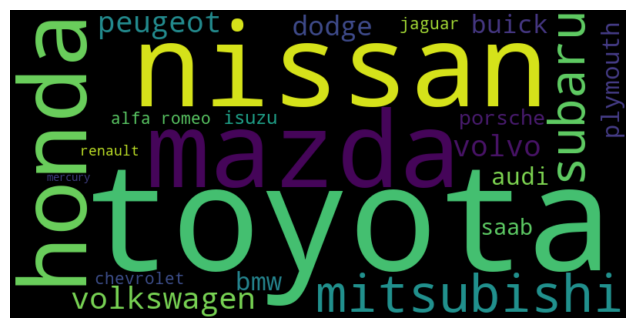

In [13]:
# Contar la frecuencia de cada marca
marca_counts= Counter(cars['marca'].astype(str).tolist())

# Crear una funcion para generar nubes de palabras con frecuencia
def generate_wordcloud_with_frecuency(text_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(text_counts)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generar nube de palabras para la columna 'marca'
generate_wordcloud_with_frecuency(marca_counts)    

En la nube de palabras, las marcas que mas se destacan son: Mazda, Nissan, Honda y Toyota

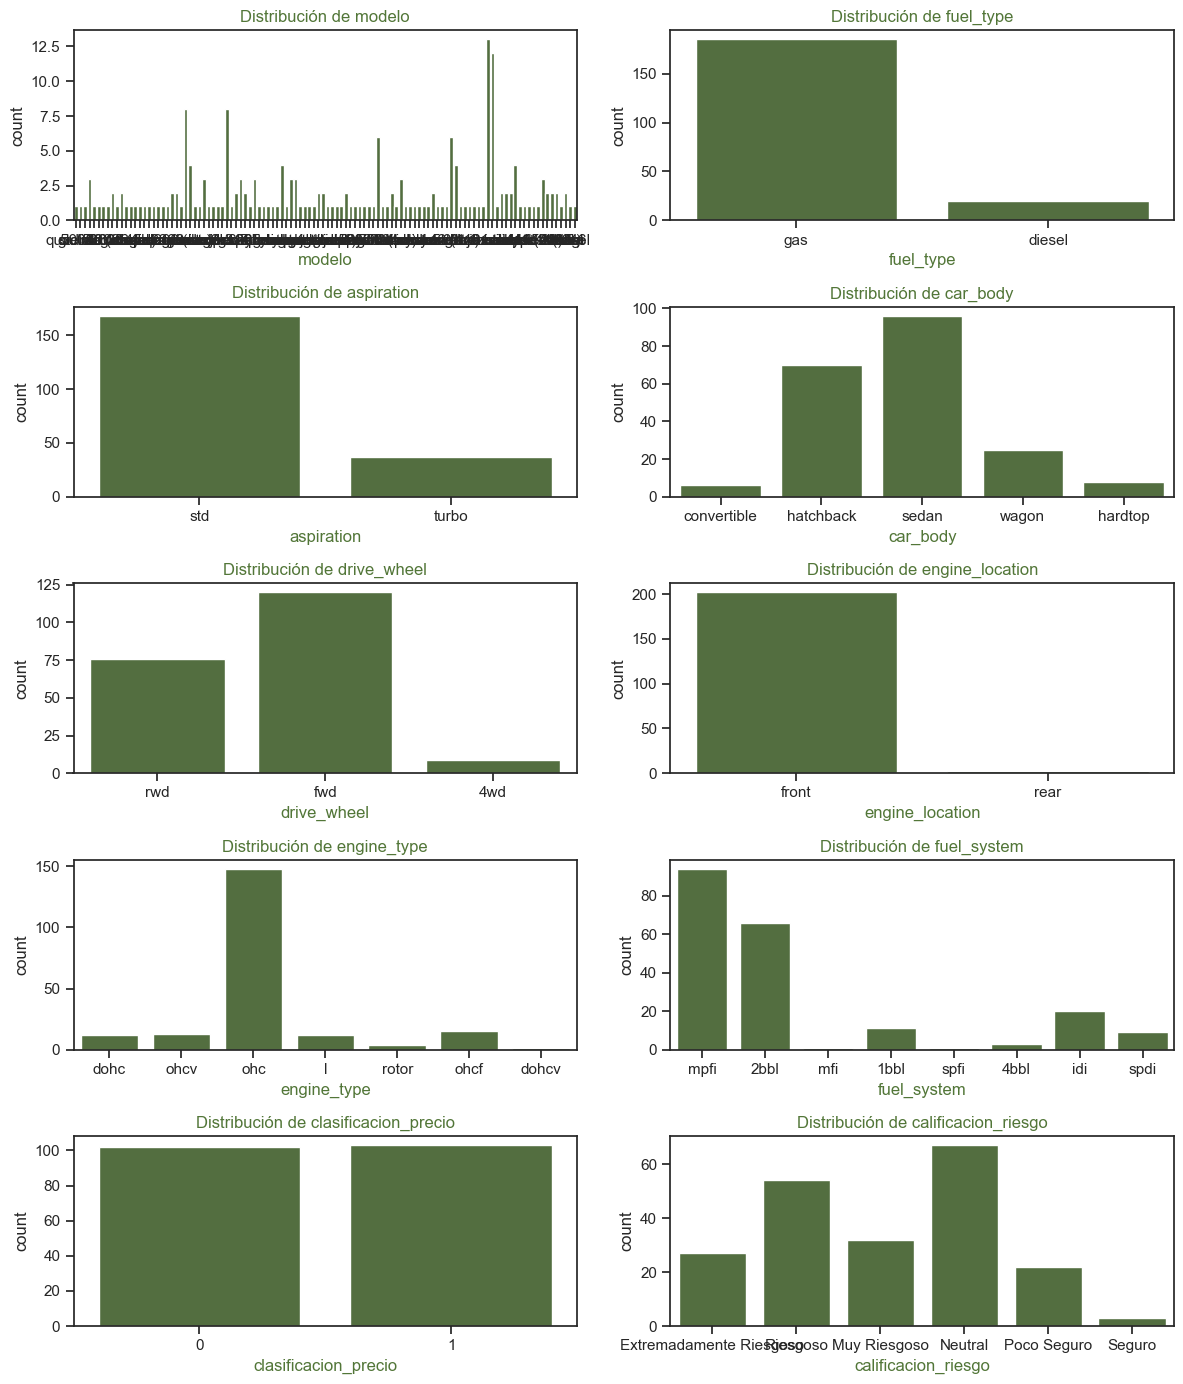

In [17]:
# Establecer el color principal
color_principal = '#527638'

# Lista de variables categoricas que deseas visualizar
variables_categoricas = ['modelo', 'fuel_type', 'aspiration', 'car_body', 'drive_wheel', 'engine_location',
                         'engine_type', 'fuel_system', 'clasificacion_precio', 'calificacion_riesgo']

# Establecer el fondo de los graficos
sns.set(style="ticks")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 14))

# Iterar sobre las variables categoricas y generar graficos
for i, variable in enumerate(variables_categoricas, 1):
    try:
        plt.subplot(5, 2, i)
        sns.countplot(x=variable, data=cars, color=color_principal)
        plt.title(f'Distribución de {variable}', color=color_principal)
        plt.xlabel(variable, color=color_principal)
    except ValueError as e:
        print(f"Error: {e}. Variable: {variable}")


# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

# Análisis de Gráficos de Barras

Los gráficos de barras proporcionan una visión clara de las características más frecuentes dentro de cada categoría en nuestro conjunto de datos. Aquí se presentan algunas observaciones destacadas:

- **Tipo de Combustible:** La mayoría de los vehículos son a gasolina.
- **Transmisión:** La transmisión estándar es la más común entre los vehículos.
- **Tipo de Carrocería:** Los vehículos tipo sedan son los más predominantes en el conjunto de datos.
- **Tracción:** La tracción delantera es la opción más popular entre los vehículos.
- **Clasificación de Riesgo:** La mayoría de los vehículos son considerados de riesgo neutro.

Estas observaciones proporcionan una comprensión inicial de las preferencias y características dominantes en nuestro conjunto de datos. Es importante tener en cuenta estas tendencias al realizar análisis más detallados o al desarrollar modelos predictivos

# Análisis Univariable: 'Price'

La variable 'Price' es la variable objetivo de este conjunto de datos y será el foco de nuestro análisis en esta sección. Algunas observaciones iniciales sobre esta variable incluyen:

- **Distribución de Precios:** Es crucial comprender la distribución de los precios en el conjunto de datos. Esto nos ayudará a identificar posibles sesgos, valores atípicos y patrones generales.

- **Estadísticas Descriptivas:** Calcular estadísticas descriptivas como la media, la mediana, la desviación estándar y los cuartiles nos proporcionará una idea de la tendencia central y la dispersión de los precios.

- **Gráficos de Distribución:** Utilizar gráficos como histogramas y gráficos de densidad nos permitirá visualizar la distribución de los precios y detectar cualquier anomalía en la forma de la distribución.

- **Valores Atípicos:** Identificar y analizar valores atípicos en los precios nos ayudará a comprender su impacto en nuestro análisis y, posiblemente, considerar su tratamiento en pasos posteriores del análisis.

Este análisis univariable de la variable 'Price' es fundamental para obtener una comprensión profunda de esta característica clave en nuestro conjunto de datos. Proporcionará información crucial que informará nuestros pasos futuros en el análisis exploratorio de datos y la modelización predictiva.


In [19]:
# Resumen de estadisticas descriptivas 
cars['price'].describe()

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# Análisis Descriptivo de la Variable "Price"

- **Observaciones:** Tenemos un total de 205 observaciones para la variable "Price".

- **Rango de Precios:** El rango de precios abarca 40,282 unidades, desde el precio mínimo hasta el máximo.

- **Promedio:** El precio promedio es de 13,276 unidades.

- **Percentiles:** 
  - El 50% de los datos tienen un valor inferior a 10,295, lo que indica que la mitad de los precios son inferiores a este número.
  - El valor correspondiente al percentil 75% es 16,503.

- **Valores Atípicos:** 
  - El valor máximo de 45,400 está considerablemente por encima del valor correspondiente al 75% de los datos, lo que sugiere la presencia de valores atípicos o extremadamente grandes en la variable de precios.

Este análisis descriptivo proporciona una comprensión detallada de la distribución de la variable "Price". La presencia de valores atípicos o extremadamente grandes puede influir en el análisis y en la modelización predictiva, por lo que es importante tenerlos en cuenta en etapas posteriores del análisis.

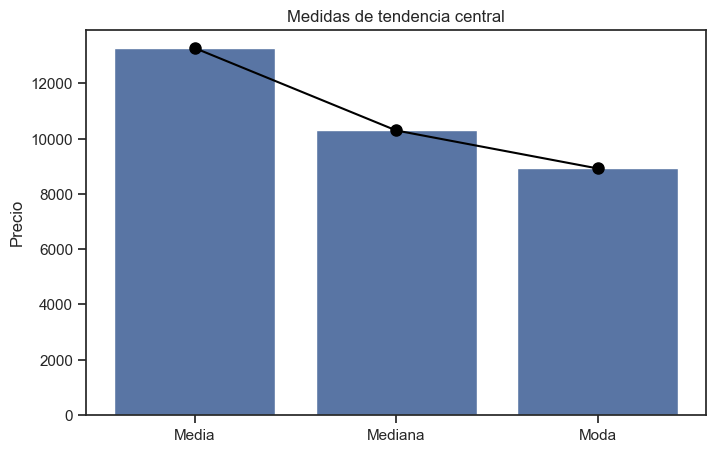

In [22]:
# Calcular medidas de tendencia central
sns.set(style="ticks")

mean_value = cars['price'].mean()
median_value = cars['price'].median()
mode_value = cars['price'].value_counts().idxmax()

# Crear un grafico de barras 
plt.figure(figsize=(8, 5))
sns.barplot(x=['Media', 'Mediana', 'Moda'], y=[mean_value, median_value, mode_value])

#Añadir lineas para conectar las medidas
plt.plot([0, 1, 2], [mean_value, median_value, mode_value], marker='o', markersize=8, color='black')

# Configurar etiquetas 
plt.title('Medidas de tendencia central')
plt.ylabel('Precio')

# Mostrar el grafico
plt.show()

In [23]:
#Medidas de Dispersión
range_value = cars['price'].max() - cars['price'].min()

# Valor del rango
print(f'Rango de la variable price: {range_value}')

Rango de la variable price: 40282


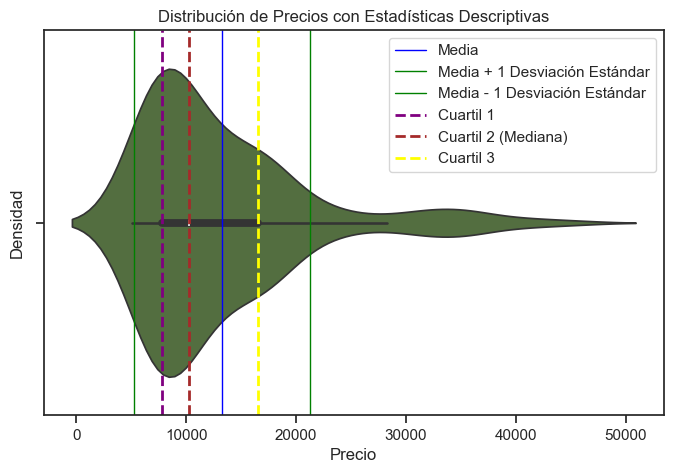

In [24]:
std_dev_value = cars['price'].std()

# Calcular cuartiles
quartiles = cars['price'].quantile([0.25, 0.5, 0.75])

# Configurar el estilo de seaborn
sns.set(style="ticks")

# Gráfico de violín para visualizar la distribución de precios
plt.figure(figsize=(8, 5))
sns.violinplot(x=cars['price'], color='#527638')

# Añadir líneas para la media y las desviaciones estándar
plt.axvline(mean_value, color='blue', linewidth=1, label='Media')
plt.axvline(mean_value + std_dev_value, color='green', linewidth=1, label='Media + 1 Desviación Estándar')
plt.axvline(mean_value - std_dev_value, color='green', linewidth=1, label='Media - 1 Desviación Estándar')

# Añadir líneas para los cuartiles
plt.axvline(quartiles.loc[0.25], color='purple', linestyle='dashed', linewidth=2, label='Cuartil 1')
plt.axvline(quartiles.loc[0.5], color='brown', linestyle='dashed', linewidth=2, label='Cuartil 2 (Mediana)')
plt.axvline(quartiles.loc[0.75], color='yellow', linestyle='dashed', linewidth=2, label='Cuartil 3')

# Configurar etiquetas y leyenda
plt.title('Distribución de Precios con Estadísticas Descriptivas')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

# Interpretación del Gráfico de Violín

En el gráfico de violín, se observa un sesgo hacia la derecha en la distribución de la variable 'Price'. Esto se evidencia por las siguientes razones:

- **Media, Mediana y Moda:** La media supera tanto a la mediana como a la moda. Este patrón sugiere que hay valores extremadamente grandes en el conjunto de datos que están sesgando la distribución hacia la derecha. 

- **Forma del Violín:** La forma del violín también puede proporcionar pistas sobre la distribución de los datos. En este caso, la forma del violín sugiere una mayor concentración de datos en el extremo inferior (valores más bajos), con una cola larga en el extremo superior (valores más altos).

En resumen, el sesgo hacia la derecha en el gráfico de violín indica la presencia de valores extremadamente grandes en la variable 'Price', lo que influye en la media y hace que supere tanto a la mediana como a la moda.

In [25]:
# Asimetría y curtosis
print("Skewness: %f" % cars['price'].skew())
print("Kurtosis: %f" % cars['price'].kurt())

Skewness: 1.777678
Kurtosis: 3.051651


# Interpretación de la Skewness y Kurtosis

La skewness (sesgo) de 1.777678 indica un sesgo positivo en la distribución de la variable 'Price', lo que significa que hay una inclinación hacia la derecha. Esto confirma lo observado en el gráfico de violín, donde se evidencia un sesgo hacia la derecha en la distribución de los precios.

Por otro lado, la kurtosis de 3.051651 sugiere cierta presencia de colas más pesadas y picos más altos en comparación con una distribución normal estándar. Esto indica que la distribución de los precios tiene colas más largas y picos más altos que una distribución normal, lo que respalda la presencia de valores extremadamente grandes y una mayor concentración de datos en el extremo inferior de la distribución.

En resumen, tanto la skewness como la kurtosis apuntan a una distribución sesgada hacia la derecha con colas más pesadas y picos más altos en la distribución de la variable 'Price'.

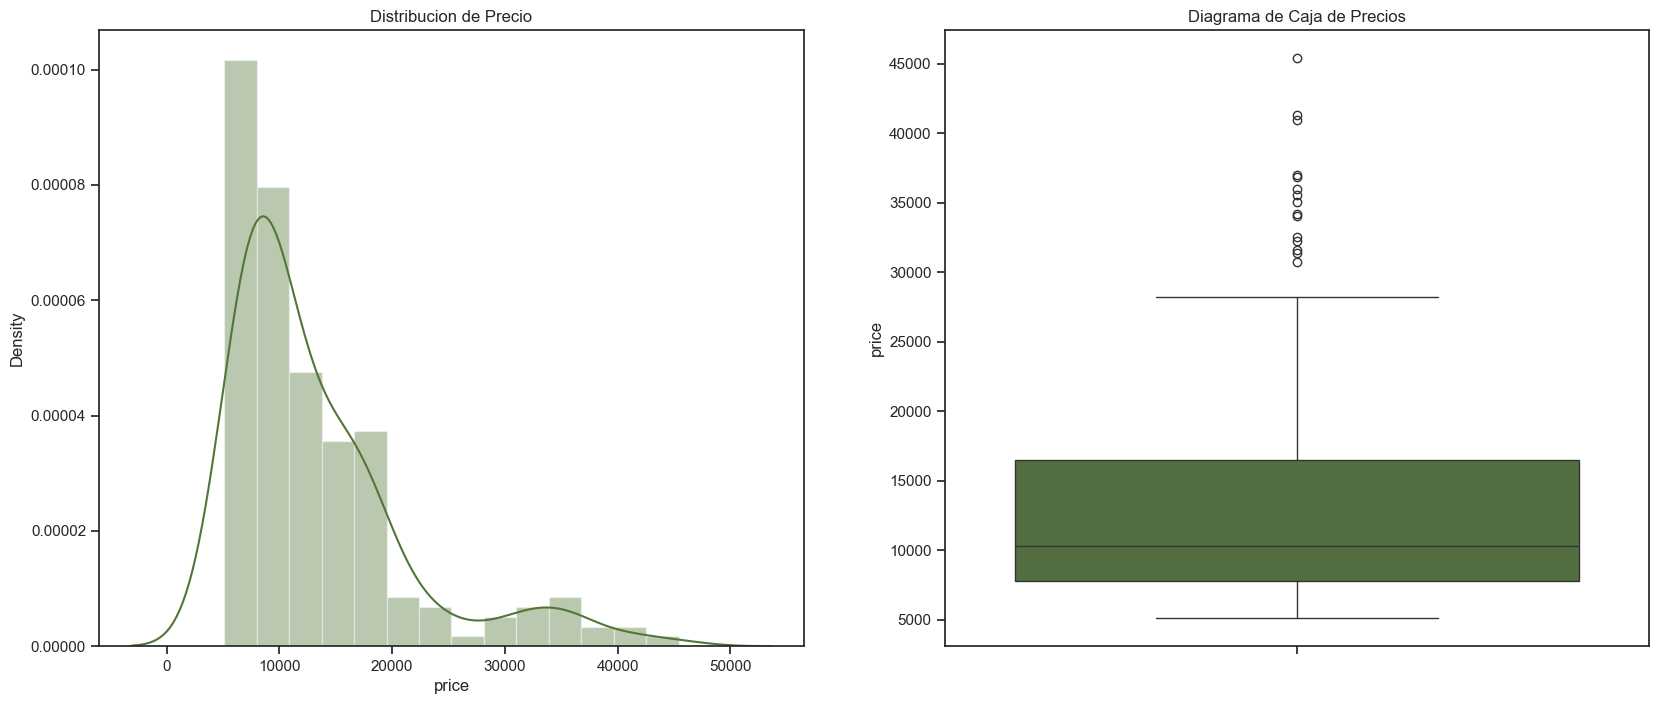

In [26]:
plt.figure(figsize=(20,8))

# Establecer el fondo de los gráficos
sns.set(style="ticks")

plt.subplot(1,2,1)
plt.title('Distribucion de Precio')
sns.distplot(cars['price'], color= '#527638')

plt.subplot(1,2,2)
plt.title('Diagrama de Caja de Precios')
sns.boxplot(y=cars.price, color= '#527638')

plt.show()


# Relación de 'Price' con Variables Numéricas

## Gráficos de Dispersión
Podemos visualizar la relación entre 'Price' y otras variables numéricas utilizando gráficos de dispersión. Esto nos ayudará a identificar cualquier patrón o tendencia en la relación entre estas variables.

## Coeficiente de Correlación
Calculemos el coeficiente de correlación, como el coeficiente de correlación de Pearson, entre 'Price' y otras variables numéricas. Este valor nos proporcionará una medida cuantitativa de la fuerza y dirección de la relación lineal entre estas variables.

## Interpretación
Una vez que hayamos visualizado la relación y calculado la correlación, podemos interpretar los resultados para determinar qué variables numéricas están más fuertemente relacionadas con 'Price' y cómo se relacionan entre sí. Esto nos ayudará a identificar las características más importantes para predecir el precio de los vehículos en nuestro conjunto de datos.

## Gráfico de Matriz de Correlación (opcional)
También podemos crear un gráfico de matriz de correlación para visualizar de manera más completa las correlaciones entre 'Price' y todas las demás variables numéricas en una sola figura.

Este análisis nos permitirá comprender mejor la relación entre 'Price' y otras variables numéricas en nuestro conjunto de datos, lo que será útil para el modelado predictivo y la toma de decisiones.

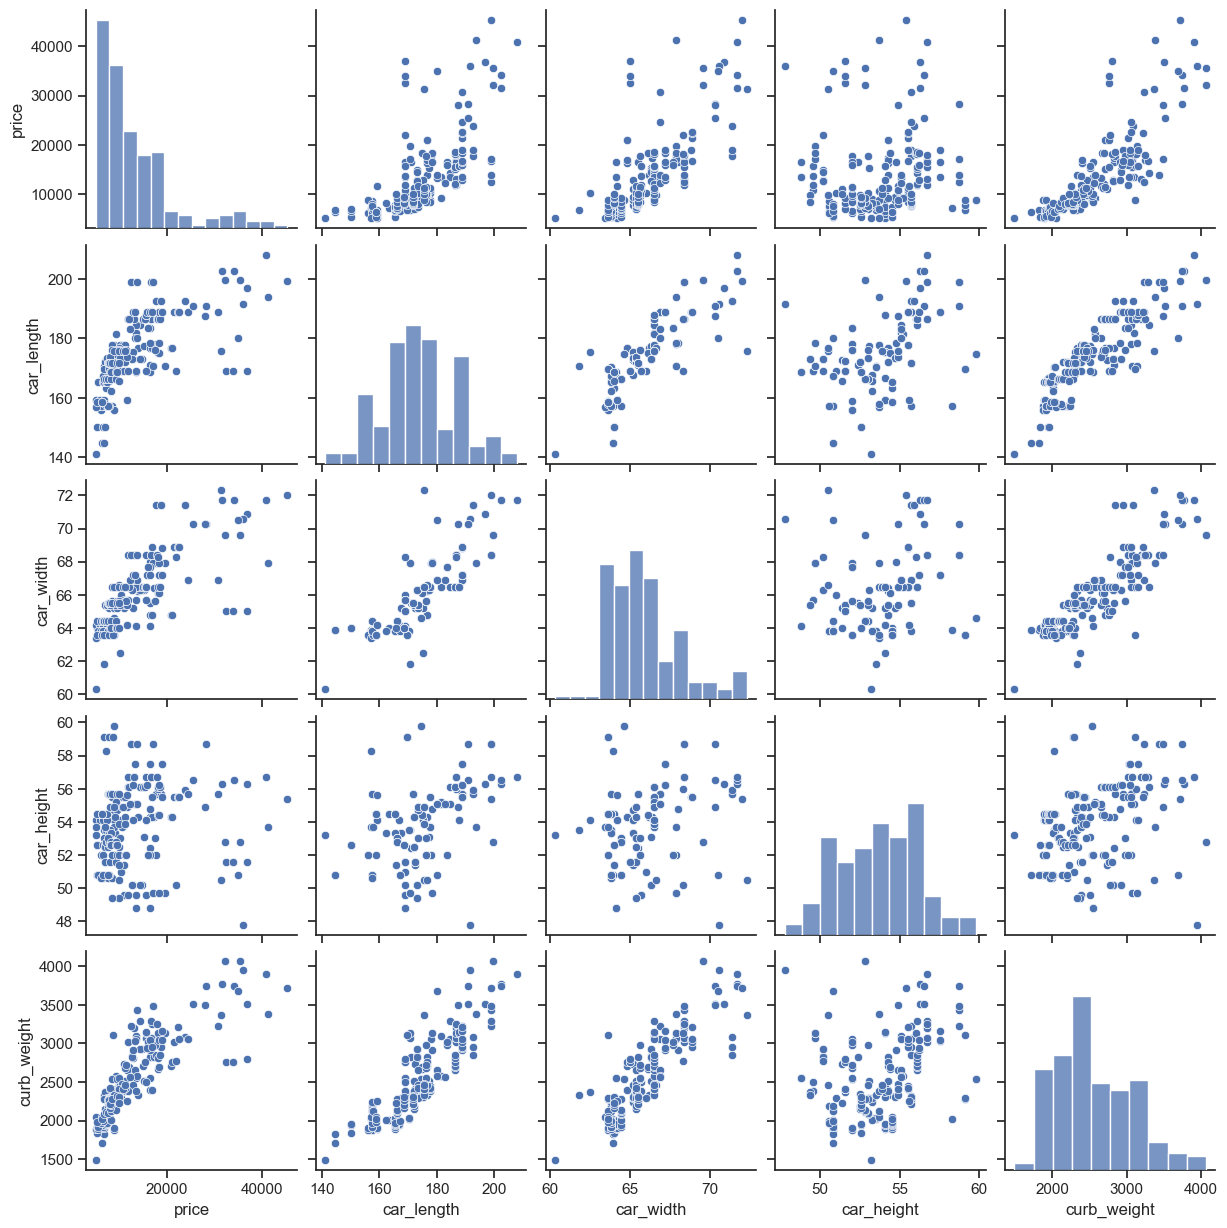

In [27]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'car_length', 'car_width', 'car_height', 'curb_weight']
sns.pairplot(cars[cols], height=2.5)
plt.show()

Al examinar el pairplot, podemos explorar las interacciones entre las variables numéricas en nuestro conjunto de datos. Se observa que el precio muestra una tendencia positiva en relación con 'curb_weight' y 'car_width', lo que implica que vehículos más pesados y anchos tienden a tener un precio más alto. Esta relación sugiere que estos atributos podrían influir significativamente en la valoración de un automóvil en el mercado.

Sin embargo, al analizar 'car_height', no se observa una relación tan clara con el precio. Esto sugiere que la altura del automóvil puede no ser un factor tan determinante en el precio como el peso y el ancho. Esto podría deberse a que el público generalmente valora más el tamaño y la presencia visual del automóvil en términos de su peso y ancho, en lugar de su altura.

En resumen, mientras que el peso y el ancho del automóvil parecen ser indicadores importantes del precio, la altura del automóvil no parece tener una influencia tan significativa en la valoración del mercado.